# Twitter Sentiment Analysis Project

## Overview

The goal of this project is to build a machine learning model to analyze tweets that can predict people's sentiments.

## Business Problem

Apple company hired a data scientist to build a machine learning model that can predict customers' sentiments towards their products and their competitors' products. The algorithm will predict whether a customer is happy or not and identify how the company can do better. 

## Data Understanding




In [46]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nltk 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB



In [47]:
# #To display full output in Jupyter notebook, not only last result without using the print function
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [48]:
!ls data/

glove.6B.50d.txt
judge-1377884607_tweet_product_company.csv


In [49]:
# read in the data
df =pd.read_csv("data/judge-1377884607_tweet_product_company.csv", encoding="'ISO-8859-1'")
df.head(30)
# encoding type from: https://stackoverflow.com/questions/21504319/python-3-csv-file-giving-unicodedecodeerror-utf-8-codec-cant-decode-byte-err

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [50]:
# get some stat and info about the data
df.shape
df.describe()# checking some stat
df.info() #check type of data and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [51]:
# rename the columns
df = df.rename(columns={"tweet_text":"tweet","emotion_in_tweet_is_directed_at":"product",
                        "is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"})
df.tail()

,tweet,product,sentiment
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


## Scrub the data

In [52]:
df.isna().sum() #check for any missing value 
# will decide about the null in product later

tweet           1
product      5802
sentiment       0
dtype: int64

In [53]:
df= df.dropna(subset= ["tweet"])

In [54]:
df["tweet"].isna().sum()

0

In [55]:
df["tweet"].duplicated().any()

True

## Explore the data

In [56]:
# check the target value count
df['sentiment'].value_counts(normalize =True)

No emotion toward brand or product    0.592609
Positive emotion                      0.327541
Negative emotion                      0.062692
I can't tell                          0.017158
Name: sentiment, dtype: float64

In [57]:
# rename the name of sentiment to a better one
emotion = {"No emotion toward brand or product": "neutral",
            "Positive emotion": "positive",
            "Negative emotion": "negative",
            "I can't tell": "unknown"}
df["sentiment"] = df["sentiment"].map(emotion)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

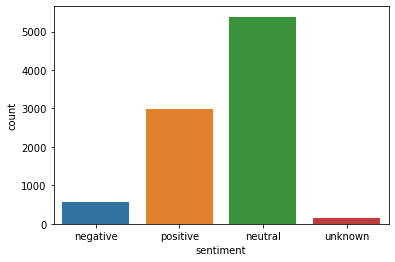

In [58]:
sns.countplot(df["sentiment"])

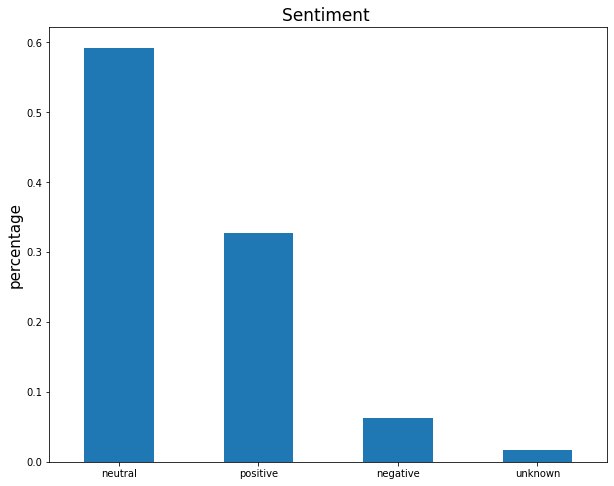

In [59]:
# plot the different types of sentiment
df["sentiment"].value_counts(normalize =True).plot(kind="bar",figsize=(10,8));
plt.title("Sentiment ", fontsize=17)
plt.ylabel("percentage",fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [60]:
# drop the small percentage of unknown sentiment, it doesn't add up any value to the data
df.drop(df[df['sentiment'] == "unknown"].index, inplace = True)

In [61]:
# sanity check
df['sentiment'].value_counts(normalize =True)

neutral     0.602954
positive    0.333259
negative    0.063787
Name: sentiment, dtype: float64

In [62]:
df['product'].value_counts(normalize =True)

iPad                               0.287020
Apple                              0.200792
iPad or iPhone App                 0.143205
Google                             0.130713
iPhone                             0.090189
Other Google product or service    0.088970
Android App                        0.024680
Android                            0.023766
Other Apple product or service     0.010664
Name: product, dtype: float64

In [63]:
company_product = {"iPad": "apple",
            "Apple": "apple",
            "iPad or iPhone App": "apple",
           "Google": "google",
            "iPhone": "apple",
            "Other Google product or service": "google",
            "Android App": "google",
            "Android": "google",
            "Other Apple product or service": "apple"}
df["product"] = df["product"].map(company_product)

In [64]:
# sanity check
df['product'].value_counts(normalize =True)

apple     0.731871
google    0.268129
Name: product, dtype: float64

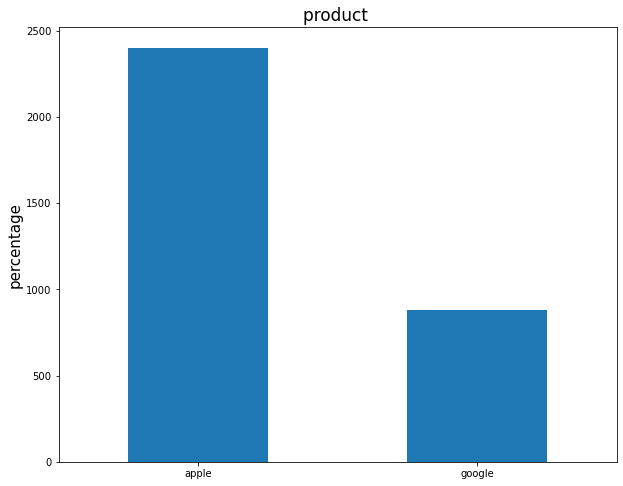

In [65]:
# plot the different types of sentiment
df["product"].value_counts().plot(kind="bar",figsize=(10,8));
plt.title("product ", fontsize=17)
plt.ylabel("percentage",fontsize=15)
plt.xticks(rotation=0)
plt.show()

(array([0, 1]), [Text(0, 0, 'apple'), Text(1, 0, 'google')])

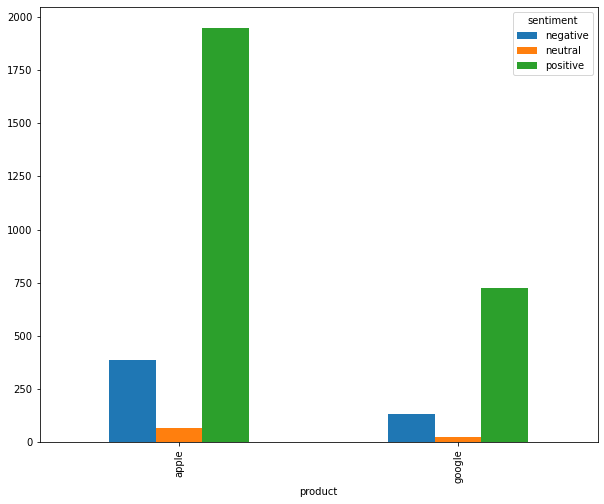

In [66]:
# Plot Sentiment by product without normalization
df.groupby(["product", "sentiment"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=90)

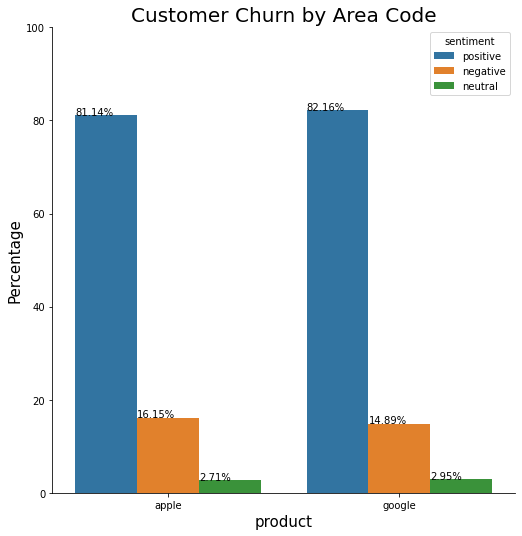

In [67]:
# Plot Customer Churn by Area Code without with normalization
x,y = "product", "sentiment"

df2 = df.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df2,legend_out=False,height=7, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('product', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn by Area Code', fontsize=20)
plt.show()    
#after normalize the value counts of the area code, it is clear that the churn rate is almost the same in all areas.
# so area code doesn't have any significant effect on the customer churn

In [68]:
df["tweet"].head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet, dtype: object

In [69]:
df["tweet"]

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet, Length: 8936, dtype: object

In [70]:
# delet the las row from the df 
df = df.iloc[:-1 , :]

In [71]:
df['tweet'].unique()

array(['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
       "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
       '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
       ...,
       'Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles',
       "Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",
       'Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.'],
      dtype=object)

In [66]:
# df["tweet"]= df["tweet"].str.replace(',', '')

In [67]:
# # convert the tweet to string because it was giving me error
# df["tweet"] = str(df["tweet"])

In [72]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [73]:
df["tweet"] = df["tweet"].str.replace('[^\w\s]','')

In [74]:
df["tweet"]

0       wesley83 i have a 3g iphone after 3 hrs tweeti...
1       jessedee know about fludapp  awesome ipadiphon...
2       swonderlin can not wait for ipad 2 also they s...
3       sxsw i hope this years festival isnt as crashy...
4       sxtxstate great stuff on fri sxsw marissa maye...
                              ...                        
9087    mention yup but i dont have a third app yet im...
9088                            ipad everywhere sxsw link
9089    wave buzz rt mention we interrupt your regular...
9090    googles zeiger a physician never reported pote...
9091    some verizon iphone customers complained their...
Name: tweet, Length: 8935, dtype: object

In [75]:
import nltk
nltk.download("stopwords")

# Make a list of stopwords to remove
from nltk.corpus import stopwords
import string
string.punctuation
# Preprocess reviews
stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words += ['“','”','...','``',"''",'’',"httpst",'amp',"theto","}",
                    "{",",",'rt', 'mention',"http:","https:",'sxtx', '@mention','#SXSW.']
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hudakassoumeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
df["tweet"].unique()

array(['wesley83 i have a 3g iphone after 3 hrs tweeting at rise_austin it was dead i need to upgrade plugin stations at sxsw',
       'jessedee know about fludapp  awesome ipadiphone app that youll likely appreciate for its design also theyre giving free ts at sxsw',
       'swonderlin can not wait for ipad 2 also they should sale them down at sxsw',
       ...,
       'wave buzz rt mention we interrupt your regularly scheduled sxsw geek programming with big news link google circles',
       'googles zeiger a physician never reported potential ae yet fda relies on physicians quotwere operating wout dataquot sxsw health2dev',
       'some verizon iphone customers complained their time fell back an hour this weekend of course they were the new yorkers who attended sxsw'],
      dtype=object)

In [77]:
import re
for tweet in df["tweet"]:
    print(tweet)
    re.sub(r'<[^>]*>', '', tweet) 

wesley83 i have a 3g iphone after 3 hrs tweeting at rise_austin it was dead i need to upgrade plugin stations at sxsw
jessedee know about fludapp  awesome ipadiphone app that youll likely appreciate for its design also theyre giving free ts at sxsw
swonderlin can not wait for ipad 2 also they should sale them down at sxsw
sxsw i hope this years festival isnt as crashy as this years iphone app sxsw
sxtxstate great stuff on fri sxsw marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress
teachntech00 new ipad apps for speechtherapy and communication are showcased at the sxsw conference httphtly49n4m iear edchat asd
sxsw is just starting ctia is around the corner and googleio is only a hop skip and a jump from there good time to be an android fan
beautifully smart and simple idea rt madebymany thenextweb wrote about our hollergram ipad app for sxsw httpbitlyieavob
counting down the days to sxsw plus strong canadian dollar means stock up on apple gear
excited to

great way to prep rt mention download 20 free tracks from sxsw music sampler available on mention link
expecting to see a flood of shiny new ipad2s today mention line at apple store was around the block sxsw
so we get to see google fail at social on another day rt mention okay no google circles debuting at sxsw today
listening to some australian knob celebrity journalist shoot and reshoot and reshoot his iphone vid about meeting the celebs at sxsw
listening to some google marketers speak based on the crowd and what theyre all holding steve jobs is wealthier than i thought sxsw
google vp to speak the topic 10 quick steps to owning everything in the world sxsw link
its easy to spot the ipad 2 here at sxsw from a distance the majority of them have white screen bezels
on my way to the apple store to upgrade my pager link sxsw
listening to the developer of the netflix app for iphone talk about mistakes he made on the ap interesting stuff sxsw
i41 slap to the face link codes valid 800115959a

austinl fans rt mention head over to link by 1pm cst today to win vip access to my acoustic solo set at sxsw tonight
momi want my ipad 2 back link thingsthatdontgotogether sxsw lisa rinna
i dont want to lose your love google sxsw
so brilliant rosso used a google doc to paste in a recipe to make mothers think they generated a recipe for her leanstartup sxsw
hello gigantic line outside google v bing seo session sxsw sxswi
what company company has the best supply chain walmart and apple behance sxsw
mention any idea what time the apple store at sxsw closes tonight
is there any way of deleting an app that wont stop loading on the iphone draining my power but no x to cancel help me sxsw
fast company sxsw why google apple ea games zynga facebook microsoft and intuit went gaga for the go game link
why does anyone do a product just for one thing  just an ipad just a droid just a iphone wont ultimately work mention diller sxsw
great recap of a seemingly great sxsw session rt mention relive the 

ipad 2 goes on sale at 3 pm at sxsw  im looking at you mention  32 gig no color preference 
mayer comes out sans intro still gets cheers techrockstar launches into googles priority on location  fast fun amp future sxsw
free itunes sxsw quotfeatured artistsquot sampler link free music sxsw
apple saves sxsw set to open popup store  cnet news link sxsw
apple saves sxsw set to open popup store link apple sxsw
ux uxdes talk is really about an exploration of the wild wild west of ipad design sxsw
sxsw ladies with stds the ipad bot on twitter creator is the persistent guy who chased you all last night takeonefortheteam sxsw
holy smokes ipad2 replacing my flip cam as default video capture device beautiful elegant apple sxsw
hey foodies if youre in austin for sxsw download the new arw iphoneandroid app and use it as a guide to dine while youre in town sxsw
sxsw ladies the ipad bot on twitter creator is the persistent guy who chased you all last night hopeyoudidntgivehimnone sxsw
google presenta

thewildernessdowntowncom best of show at sxsw googles thomas gayno quotit is like a choreography of browser windowsquot sxsw
the internet blurs link the ipad fades link ûò mention at sxsw
googles new quotroutearoundquot feature gives 3 alternate routes to avoid traffic  collectively saving drivers 2 yrsday sxsw
mention new ubersocial 4 iphone now in app store includes uberguide to sxsw sponsored by mashable link
mention new ipad apps for speechtherapy and communication are showcased at the sxsw conference link iear edchat asd
mention new ipad apps for speech therapy and communication are showcased mention sxsw conference link sxswi assistivetech
mention new ipad apps for speech therapy and communication are showcased mention the sxsw conference link sxswi sxswh edapps
mention new ipad apps for speech therapy and communication are showcased at sxsw conference link sxswi hcsm sxswh
mention new ipad apps for speech therapy and communication are showcased at the sxsw conference link apraxi

rt mention google previews updated blogger interface at sxsw link
rt mention google quash circles rumours rt mention were not launching any products at sxsw but were doing plenty else ht
rt mention google route around traffic saving drivers 2 years of time per day by finding best route sxsw
rt mention google says reports about launch of circles social network at sxsw are incorrect link no launch today at any rate
rt mention google says the future is location location location link sxsw cnn
rt mention google set to launch new social network circles today at sxsw
rt mention google showing preview of nextgen blogger interface at sxsw link cnet
rt mention google smentisce novitìê in arrivo rt mention were not launching any products at sxsw but were doing plenty else link
rt mention google spokewoman nadja blagojevic email about google circle quotwe are not announcing anything like this at sxsw this is an untrue rumorquot
rt mention google tested 41 shades of blue for link colors and it mad

apple is opening up a temporary store in downtown austin for sxsw and the ipad 2 launch link
apple is opening up a temporary store in downtown austin for sxsw and the ipad 2 launch bitlyg03mzb
apple is opening up a temporary store in downtown austin for sxsw and the ipad 2 launch bitlyg03mzb cc mention mention
apple is opening up a temporary store just for the sxsw conference and the ipad 2 launch might have to make a stop
web developers if you havenûªt tried new relic sign up during sxsw and enter to win an ipad 2 come by booth 13 link
agency people at sxsw this queue if for a pop up ipad store savesxsw link
why do people at sxswi insist on sharing footage of the japanese tragedy do they not think other people at sxsw know how to google
so for people back home  seems that sxsw is putting together a popup apple store for people to get the ipad2 today 
mayer people drive 12bn miles a year using google maps navigation whither sat nav sxsw
link people waiting for the new ipad outside appl

block party capitalism ballroom f sxsw just went to google thing last session but only because first choice was full
sxsw party podcasts link mention mention mention mention iampaintedface h0u5t0n
sxsw party rule dont slip on piss and drop your iphone in the urinal true story not me either promise
sxsw party time with mention and mention thanks mention
new mike tyson game coming to the iphone  link iphone sxsw videogames tyson art cartoon
hi if you accidentally took my ipad from the techi set pepsicostage would you please return it to me sxsw link
mention u in this line rt mention 1030 am line at apple popup store in austin it opens at 5 pm sxsw link
how do you know when you are at a google party you find the only samsung galaxy tab at sxsw link
to all you nice people going to sxsw have fun check in with twit twig mention mention mention  any android podcasters
how do you use maps mayer 40 of google maps usage is mobile there r 150 million mobile users link via mention sxsw
hey if your

In [34]:
# # tweet_free_punc = [charec for charec in df["tweet"] if charec not in stop_words]
# # tweet_free_punc
# import re
# df["tweet"] = df["tweet"].apply(lambda x:  re.sub(r'<[^>]*>', '', x))
# df["tweet"] = df["tweet"].apply(lambda x: ' '.join(
#     [word for word in x.split() if word.lower() not in (stop_words)]))

In [78]:
# Preprocess our target
target_map = {'negative': 0,
              'positive': 1,
             'neutral':2}

df['sentiment'] = df['sentiment'].map(target_map)

In [79]:
# Define our X and y
X = df['tweet']
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [80]:
# Find our longest review for padding later
max_length = max([len(s.split()) for s in X_train])
max_length

33

In [35]:
X_train

8593    google introducing checkin status and rewards ...
8103    google tested 41 shades of blue for link color...
5601    rt mention catch our talk on texttospeech for ...
2615    omg there are probably 100 people in this sess...
6474    rt mention reks  mention  album in stores and ...
                              ...                        
5837    rt mention google latitude checkins follow fou...
5285    rt mention sxsw bound keep an eye out i may gi...
5488    rt mention are you at sxsw check out tokii in ...
873     come find me at the mention booth i have 2 men...
7396    tech apple opening popup store in austin for s...
Name: tweet, Length: 6701, dtype: object

In [38]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

# tokenized_review = tokenizer.tokenize(X_train)

In [81]:
# Tokenize our text
from tensorflow import keras
from tensorflow.keras import layers

tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [82]:
# Defining our results visualization function
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

In [83]:
def create_embedding_matrix(glove_filepath, word_index, embedding_dim):
    '''
    Function from https://realpython.com/python-keras-text-classification/#using-pretrained-word-embeddings
    Grabs the embeddings just for the words in our vocabulary
    
    Inputs:
    glove_filepath - string, location of the glove text file to use
    word_index - word_index attribute from the keras tokenizer
    embedding_dim - int, number of dimensions to embed, a hyperparameter
    
    Output:
    embedding_matrix - numpy array of embeddings
    '''
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(glove_filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [84]:
# Find our vocab_size to use as a param later
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

9538


In [85]:
# Padding our inputs so they're all the same length
X_train = keras.preprocessing.sequence.pad_sequences(
    X_train, maxlen=max_length, padding='post')
X_test = keras.preprocessing.sequence.pad_sequences(
    X_test, maxlen=max_length, padding='post')

In [86]:
# glove = {}
# with open('data/glove.6B.50d.txt', 'rb') as f:
#     for line in f:
#         parts = line.split()
#         word = parts[0].decode('utf-8')
#         if word in total_vocabulary:
#             vector = np.array(parts[1:], dtype=np.float32)
#             glove[word] = vector

In [87]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('data/glove.6B.50d.txt',
                                           tokenizer.word_index, 
                                           embedding_dim)

In [88]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [89]:
model = keras.models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=max_length,
                           trainable=True))
# Changing our previous simple dense layer to an LSTM
# Adding some dropout to prevent overfitting 
model.add(layers.LSTM(embedding_dim, 
                      dropout=0.2,
                      return_sequences=False))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 50)            476900    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 497,151
Trainable params: 497,151
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=es)
# This takes a decent amount of time if you don't enable Kaggle's GPUs to train on


Epoch 1/100
68/68 [==============================] - 3s 46ms/step - loss: -2.6090 - accuracy: 0.3294 - val_loss: -5.5150 - val_accuracy: 0.3277
Epoch 2/100
68/68 [==============================] - 3s 37ms/step - loss: -6.9393 - accuracy: 0.3352 - val_loss: -8.1108 - val_accuracy: 0.3277
Epoch 3/100
68/68 [==============================] - 3s 39ms/step - loss: -9.2776 - accuracy: 0.3352 - val_loss: -10.2470 - val_accuracy: 0.3277
Epoch 4/100
68/68 [==============================] - 3s 48ms/step - loss: -11.2887 - accuracy: 0.3352 - val_loss: -12.1892 - val_accuracy: 0.3277
Epoch 5/100
68/68 [==============================] - 3s 45ms/step - loss: -13.2990 - accuracy: 0.3352 - val_loss: -14.1593 - val_accuracy: 0.3277
Epoch 6/100
68/68 [==============================] - 3s 42ms/step - loss: -15.2799 - accuracy: 0.3352 - val_loss: -16.0952 - val_accuracy: 0.3277
Epoch 7/100
68/68 [==============================] - 3s 40ms/step - loss: -17.2347 - accuracy: 0.3352 - val_loss: -18.0115 - val_

Epoch 57/100
68/68 [==============================] - 3s 37ms/step - loss: -110.1924 - accuracy: 0.3352 - val_loss: -109.8765 - val_accuracy: 0.3277
Epoch 58/100
68/68 [==============================] - 3s 44ms/step - loss: -112.0621 - accuracy: 0.3352 - val_loss: -111.7177 - val_accuracy: 0.3277
Epoch 59/100
68/68 [==============================] - 3s 40ms/step - loss: -113.8877 - accuracy: 0.3352 - val_loss: -113.5152 - val_accuracy: 0.3277
Epoch 60/100
68/68 [==============================] - 3s 48ms/step - loss: -115.7098 - accuracy: 0.3352 - val_loss: -115.3124 - val_accuracy: 0.3277
Epoch 61/100
68/68 [==============================] - 3s 48ms/step - loss: -117.5692 - accuracy: 0.3352 - val_loss: -117.1800 - val_accuracy: 0.3277
Epoch 62/100
68/68 [==============================] - 3s 39ms/step - loss: -119.4435 - accuracy: 0.3352 - val_loss: -119.0175 - val_accuracy: 0.3277
Epoch 63/100
68/68 [==============================] - 3s 41ms/step - loss: -121.3109 - accuracy: 0.3352 - 

Test loss: -188.2093505859375
Test accuracy: 0.327663391828537


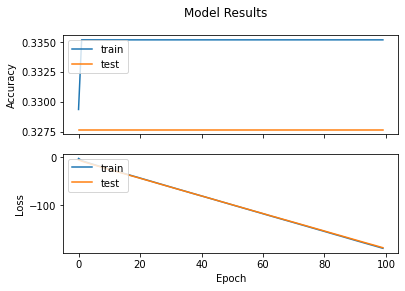

In [91]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Visualize results
visualize_training_results(history)

In [ ]:
# tweet_free_punc_join = " ".join(tweet_free_punc)
# tweet_free_punc_join

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(df["tweet"])

In [ ]:
# is there a way to read  in the data without putting the whole path,